In [ ]:
!sudo apt-get install python3.9-distutils
!curl -sS https://bootstrap.pypa.io/get-pip



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.9-lib2to3
The following NEW packages will be installed:
  python3.9-distutils python3.9-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,234 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-lib2to3 all 3.9.22-1+jammy1 [127 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-distutils all 3.9.22-1+jammy1 [193 kB]
Fetched 319 kB in 2s (202 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fronte

In [ ]:
pip install tensorflow==2.13.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output


In [3]:
!pip install --upgrade numpy==1.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)


In [ ]:
!pip install --upgrade numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
flax 0.10.5 requires jax>=0.5.1, but you have jax 0.4.38 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.0 which is incompatible.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!unzip /content/drive/MyDrive/blood/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/A-/cluster_1_3319.BMP  
  inflating: data/train/A-/cluster_1_3326.BMP  
  inflating: data/train/A-/cluster_1_3329.BMP  
  inflating: data/train/A-/cluster_1_3350.BMP  
  inflating: data/train/A-/cluster_1_3353.BMP  
  inflating: data/train/A-/cluster_1_3356.BMP  
  inflating: data/train/A-/cluster_1_3372.BMP  
  inflating: data/train/A-/cluster_1_3381.BMP  
  inflating: data/train/A-/cluster_1_3394.BMP  
  inflating: data/train/A-/cluster_1_3404.BMP  
  inflating: data/train/A-/cluster_1_3409.BMP  
  inflating: data/train/A-/cluster_1_3414.BMP  
  inflating: data/train/A-/cluster_1_3416.BMP  
  inflating: data/train/A-/cluster_1_3421.BMP  
  inflating: data/train/A-/cluster_1_3423.BMP  
  inflating: data/train/A-/cluster_1_3424.BMP  
  inflating: data/train/A-/cluster_1_3435.BMP  
  inflating: data/train/A-/cluster_1_3438.BMP  
  inflating: data/train/A-/cluster_1_3444.BMP  
  inflating: data/train/A-/cluster_1_

In [ ]:
!pip install --force-reinstall --no-cache-dir numpy seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 159.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 164.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 152.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 181.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.2.3


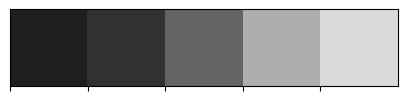

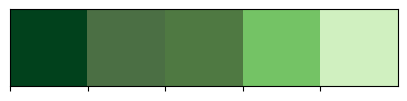

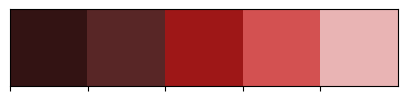

In [ ]:
import seaborn as sns
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['A+','A-','AB+','AB-','B+','B-','O+','O-']

In [ ]:
import os
import cv2
from tqdm import tqdm
import numpy as np

X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/data','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/data','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 320/320 [00:00<00:00, 8324.15it/s]


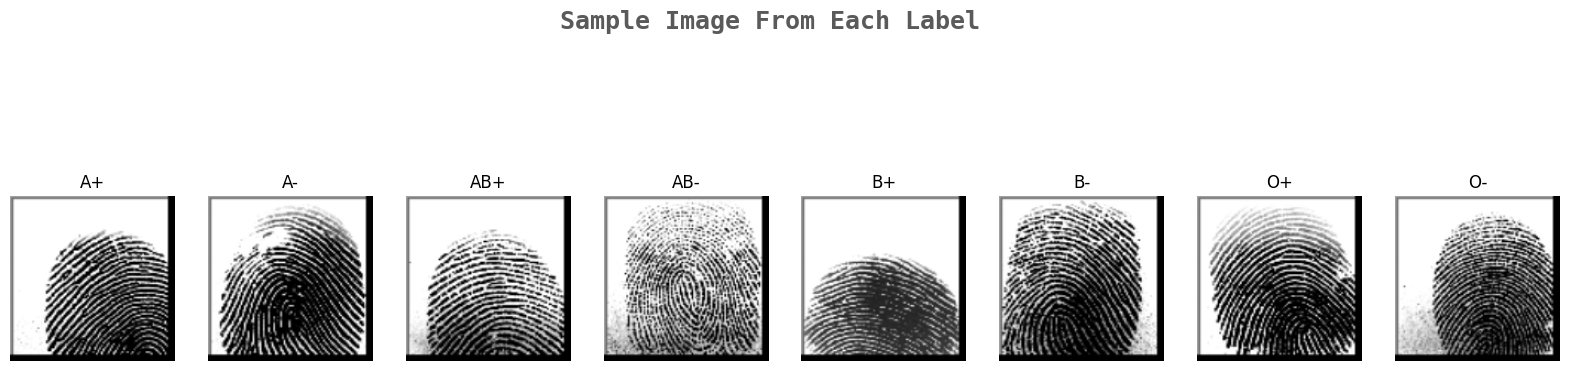

In [ ]:
import matplotlib.pyplot as plt

k=0
fig, ax = plt.subplots(1,8,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(8990, 150, 150, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(8091, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
!pip install tensorflow


In [ ]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 137.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.4.38 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.4.38 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
jax 0.4.38 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incom

In [ ]:
!pip install tensorflow==2.15.0


In [ ]:
import tensorflow as tf
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(8,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
!pip install --upgrade numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 167.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.4 which is incompatible.
jax 0.4.38 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorstore 0.1.73 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is in

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =5, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/5
205/205 [==============================] - ETA: 0s - loss: 0.6327 - accuracy: 0.7738
Epoch 1: val_accuracy improved from -inf to 0.89712, saving model to effnet.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


205/205 [==============================] - 505s 2s/step - loss: 0.6327 - accuracy: 0.7738 - val_loss: 0.3085 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 2/5
205/205 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8756
Epoch 2: val_accuracy improved from 0.89712 to 0.89849, saving model to effnet.h5
205/205 [==============================] - 498s 2s/step - loss: 0.3399 - accuracy: 0.8756 - val_loss: 0.2728 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 3/5
205/205 [==============================] - ETA: 0s - loss: 0.2668 - accuracy: 0.9029
Epoch 3: val_accuracy did not improve from 0.89849
205/205 [==============================] - 483s 2s/step - loss: 0.2668 - accuracy: 0.9029 - val_loss: 0.3337 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 4/5
205/205 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9208
Epoch 4: val_accuracy did not improve from 0.89849

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
205/205 [==========

In [ ]:
from warnings import filterwarnings

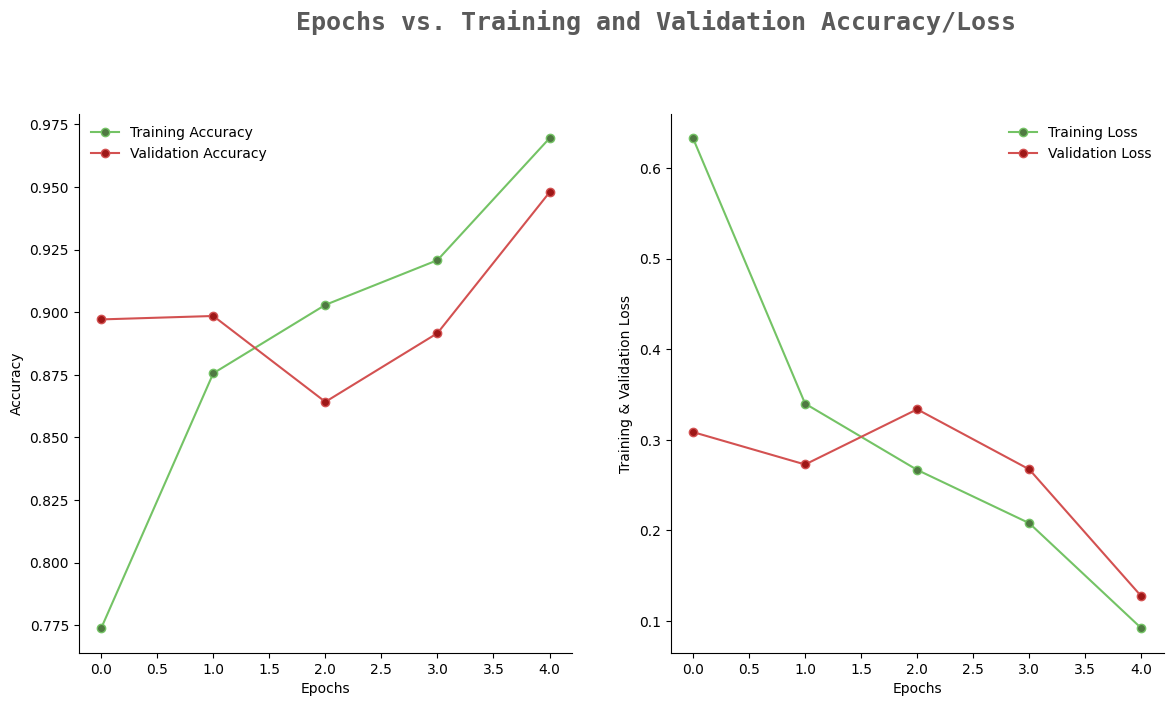

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(5)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

26/26 [==============================] - 16s 557ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.92      0.96      0.94       127
           2       0.95      0.97      0.96       106
           3       0.94      0.95      0.95       106
           4       1.00      0.93      0.96       101
           5       0.97      0.97      0.97        88
           6       0.99      0.90      0.94        98
           7       0.93      0.97      0.95        94

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



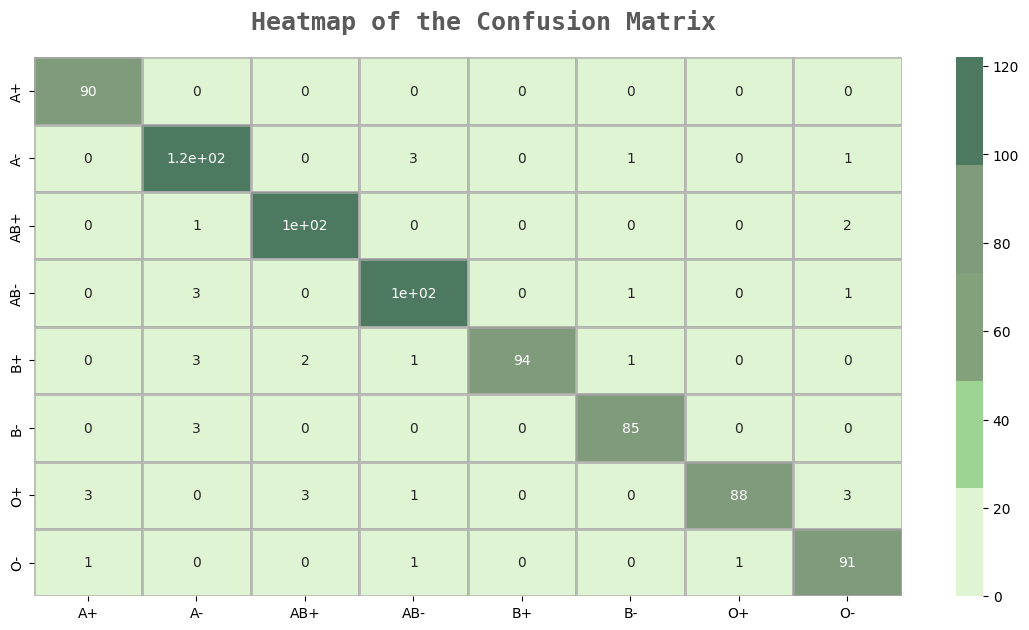

In [ ]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    # Assuming 'uploader' is a widget containing the uploaded file
    for name, file_info in upload.value.items():
        # Open the image
        img = Image.open(io.BytesIO(file_info['content']))
        # Convert to OpenCV format
        opencv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        # Resize the image to 150x150
        img_resized = cv2.resize(opencv_image, (150, 150))
        # Reshape the image to match the input shape expected by the model
        img_reshaped = img_resized.reshape(1, 150, 150, 3)

        # Predict the class
        predictions = model.predict(img_reshaped)
        predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class index

        # Define the labels for the 8 classes
        labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

        # Get the corresponding label for the predicted class
        predicted_label = labels[predicted_class]

        # Print the result
        print(f"The model predicts the blood type as: {predicted_label}")


In [ ]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output

# Button for prediction
button = widgets.Button(description='Predict', button_style='success')  # Add some style
out = widgets.Output()

# Define the callback function for the button
def on_button_clicked(_):
    with out:
        clear_output()  # Clear previous outputs
        try:
            # Call the prediction function
            img_pred(uploader)
        except Exception as e:
            # Handle errors gracefully
            print('No Image Uploaded or Invalid Image File')
            print(f"Error: {str(e)}")

# Attach the callback function to the button
button.on_click(on_button_clicked)

# Display the button and output area in a vertical layout
display(widgets.VBox([button, out]))


In [ ]:
import io
import cv2
import numpy as np
from PIL import Image
import ipywidgets as widgets
from IPython.display import clear_output, display

# File upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

# Recommendations based on blood groups
def get_recommendations(blood_group):
    recommendations = {
        "A+": {"Fruits": ["Berries", "Apples"], "Vegetables": ["Spinach", "Carrots"], "Exercise": ["Yoga", "Meditation"]},
        "A-": {"Fruits": ["Oranges", "Pineapple"], "Vegetables": ["Celery", "Zucchini"], "Exercise": ["Walking", "Tai Chi"]},
        "B+": {"Fruits": ["Bananas", "Papaya"], "Vegetables": ["Broccoli", "Eggplant"], "Exercise": ["Swimming", "Cycling"]},
        "B-": {"Fruits": ["Grapes", "Pineapple"], "Vegetables": ["Cabbage", "Beets"], "Exercise": ["Hiking", "Dancing"]},
        "AB+": {"Fruits": ["Figs", "Watermelon"], "Vegetables": ["Cauliflower", "Kale"], "Exercise": ["Light jogging", "Yoga"]},
        "AB-": {"Fruits": ["Cherries", "Kiwi"], "Vegetables": ["Cucumber", "Spinach"], "Exercise": ["Stretching", "Walking"]},
        "O+": {"Fruits": ["Mango", "Bananas"], "Vegetables": ["Broccoli", "Peppers"], "Exercise": ["Running", "Weightlifting"]},
        "O-": {"Fruits": ["Plums", "Avocado"], "Vegetables": ["Kale", "Tomatoes"], "Exercise": ["Aerobics", "HIIT"]}
    }
    return recommendations.get(blood_group, {"Fruits": [], "Vegetables": [], "Exercise": []})

# Prediction function
def img_pred(upload):
    try:
        for name, file_info in upload.value.items():
            # Process uploaded image
            img = Image.open(io.BytesIO(file_info['content']))
            opencv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
            img_resized = cv2.resize(opencv_image, (150, 150))
            img_reshaped = img_resized.reshape(1, 150, 150, 3)

            # Predict the class
            predictions = model.predict(img_reshaped)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # Blood group labels
            labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
            predicted_blood_group = labels[predicted_class]
            print(f"The model predicts the blood type as: {predicted_blood_group}")

            # Get recommendations
            rec = get_recommendations(predicted_blood_group)
            print("\nRecommendations:")
            print(f"  Fruits: {', '.join(rec['Fruits'])}")
            print(f"  Vegetables: {', '.join(rec['Vegetables'])}")
            print(f"  Exercise: {', '.join(rec['Exercise'])}")
    except Exception as e:
        print("No Image Uploaded or Invalid Image File")
        print(f"Error: {e}")

# Predict button
button = widgets.Button(description='Predict', button_style='success')
out = widgets.Output()

# Button callback
def on_button_clicked(_):
    with out:
        clear_output()
        img_pred(uploader)

button.on_click(on_button_clicked)

# Display button and output
display(widgets.VBox([button, out]))


FileUpload(value={}, accept='image/*', description='Upload')